# Assignment-2 (CSCI-5901)

### Shrey Amin - B00822245
### Harsh Pamnani - B00802614

### Importing libraries

Importing all the required libraries: nltk, pandas, numpy, and sklearn.

In [2]:
!pip install nltk
import nltk
from sklearn.datasets import fetch_20newsgroups
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import numpy as np
import pandas as pd
from nltk.corpus import stopwords

### Load 20 news group dataset

Loading the dataset of 20 news group dataset having only 4 categories: alt.atheism, talk.religion.misc, comp.graphics, and sci.space. After that, printing the dataset size, target size, and target lables of the news group dataset.

In [8]:
# Loading dataset with only 4 categories
filterCategories=['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_data = fetch_20newsgroups(subset='all', shuffle=True, categories=filterCategories)
print("Dataset size is   : ",newsgroups_data.filenames.shape)
print("Target size is    : ",newsgroups_data.target.shape)
print("Target labels are : ",newsgroups_data.target)


Dataset size is   :  (3387,)
Target size is    :  (3387,)
Target labels are :  [0 1 1 ... 2 1 1]


In [11]:
# Replacing all the new lines of the each document and creating a list for the same.
for i in range(len(newsgroups_data)):
    newsgroups_data.data[i]="\n".join(newsgroups_data.data[i].split("\n"))

print(newsgroups_data.data[0])

From: healta@saturn.wwc.edu (Tammy R Healy)
Subject: Re: who are we to judge, Bobby?
Lines: 38
Organization: Walla Walla College
Lines: 38

In article <1993Apr14.213356.22176@ultb.isc.rit.edu> snm6394@ultb.isc.rit.edu (S.N. Mozumder ) writes:
>From: snm6394@ultb.isc.rit.edu (S.N. Mozumder )
>Subject: Re: who are we to judge, Bobby?
>Date: Wed, 14 Apr 1993 21:33:56 GMT
>In article <healta.56.734556346@saturn.wwc.edu> healta@saturn.wwc.edu (TAMMY R HEALY) writes:
>>Bobby,
>>
>>I would like to take the liberty to quote from a Christian writer named 
>>Ellen G. White.  I hope that what she said will help you to edit your 
>>remarks in this group in the future.
>>
>>"Do not set yourself as a standard.  Do not make your opinions, your views 
>>of duty, your interpretations of scripture, a criterion for others and in 
>>your heart condemn them if they do not come up to your ideal."
>>                         Thoughts Fromthe Mount of Blessing p. 124
>>
>>I hope quoting this doesn't make the a

# Q1 Collocation extraction

## Q1-a Tokenize the words

We have tokenized each news article into words using "word_tokenize" method from nltk library. "tokens_words_for_newsgroups" list will contain the words for each document.

In [15]:
tokens_words_for_newsgroups=[]
for i in range(len(newsgroups_data.data)):
    tokens_words_for_newsgroups.append(word_tokenize(newsgroups_data.data[i]))

print("Token words generated for", len(tokens_words_for_newsgroups), "documents.")    
print("Token words for first documents are : ")
print(tokens_words_for_newsgroups[0])

Token words generated for 3387 documents.
Token words for first documents are : 
['From', ':', 'healta', '@', 'saturn.wwc.edu', '(', 'Tammy', 'R', 'Healy', ')', 'Subject', ':', 'Re', ':', 'who', 'are', 'we', 'to', 'judge', ',', 'Bobby', '?', 'Lines', ':', '38', 'Organization', ':', 'Walla', 'Walla', 'College', 'Lines', ':', '38', 'In', 'article', '<', '1993Apr14.213356.22176', '@', 'ultb.isc.rit.edu', '>', 'snm6394', '@', 'ultb.isc.rit.edu', '(', 'S.N', '.', 'Mozumder', ')', 'writes', ':', '>', 'From', ':', 'snm6394', '@', 'ultb.isc.rit.edu', '(', 'S.N', '.', 'Mozumder', ')', '>', 'Subject', ':', 'Re', ':', 'who', 'are', 'we', 'to', 'judge', ',', 'Bobby', '?', '>', 'Date', ':', 'Wed', ',', '14', 'Apr', '1993', '21:33:56', 'GMT', '>', 'In', 'article', '<', 'healta.56.734556346', '@', 'saturn.wwc.edu', '>', 'healta', '@', 'saturn.wwc.edu', '(', 'TAMMY', 'R', 'HEALY', ')', 'writes', ':', '>', '>', 'Bobby', ',', '>', '>', '>', '>', 'I', 'would', 'like', 'to', 'take', 'the', 'liberty', 'to'

### Cleaning the dataset

Cleaning the dataset before identifying bigram collocation to identify meaningful bigram collocations. For cleaning the dataset, we have removed stopwords, non-alphabetic characters and token words with length less than 2 characters.

In [21]:
newsgroup_cleaned_tokens = []
stop_words_english = set(stopwords.words("english"))

for i in range(len(tokens_words_for_newsgroups)):
    temp_words_list = []
    for word in tokens_words_for_newsgroups[i]:
        if ((word not in stop_words_english) and (word.isalpha()) and (len(word) > 2)):
            temp_words_list.append(word.lower())
    newsgroup_cleaned_tokens.append(temp_words_list)

print("Cleaned tokens for first document are :\n", newsgroup_cleaned_tokens[0])

Cleaned tokens for first document are :
 ['from', 'healta', 'tammy', 'healy', 'subject', 'judge', 'bobby', 'lines', 'organization', 'walla', 'walla', 'college', 'lines', 'article', 'mozumder', 'writes', 'from', 'mozumder', 'subject', 'judge', 'bobby', 'date', 'wed', 'apr', 'gmt', 'article', 'healta', 'tammy', 'healy', 'writes', 'bobby', 'would', 'like', 'take', 'liberty', 'quote', 'christian', 'writer', 'named', 'ellen', 'white', 'hope', 'said', 'help', 'edit', 'remarks', 'group', 'future', 'set', 'standard', 'make', 'opinions', 'views', 'duty', 'interpretations', 'scripture', 'criterion', 'others', 'heart', 'condemn', 'come', 'ideal', 'thoughts', 'fromthe', 'mount', 'blessing', 'hope', 'quoting', 'make', 'atheists', 'gag', 'think', 'ellen', 'white', 'put', 'better', 'could', 'tammy', 'point', 'peace', 'bobby', 'mozumder', 'point', 'set', 'views', 'way', 'believe', 'saying', 'eveil', 'world', 'caused', 'atheism', 'ridiculous', 'counterproductive', 'dialogue', 'newsgroups', 'see', 'post

## Part-of-speech(POS) tagging

Performed POS tagging on generated token of words.

In [22]:
posTagged_words=[]
for i in range(len(newsgroup_cleaned_tokens)):
    posTagged_words.append(nltk.pos_tag(newsgroup_cleaned_tokens[i]))
print("POS tagging generated for", len(posTagged_words), "documents")
print("Pos-tagged words for first document are :\n",posTagged_words[0])

POS tagging generated for 3387 documents
Pos-tagged words for first document are :
 [('from', 'IN'), ('healta', 'JJ'), ('tammy', 'NN'), ('healy', 'NN'), ('subject', 'JJ'), ('judge', 'NN'), ('bobby', 'NN'), ('lines', 'NNS'), ('organization', 'NN'), ('walla', 'NN'), ('walla', 'NN'), ('college', 'NN'), ('lines', 'NNS'), ('article', 'NN'), ('mozumder', 'NN'), ('writes', 'VBZ'), ('from', 'IN'), ('mozumder', 'NN'), ('subject', 'NN'), ('judge', 'NN'), ('bobby', 'NN'), ('date', 'NN'), ('wed', 'VBD'), ('apr', 'JJ'), ('gmt', 'NN'), ('article', 'NN'), ('healta', 'NN'), ('tammy', 'NN'), ('healy', 'NN'), ('writes', 'VBZ'), ('bobby', 'RB'), ('would', 'MD'), ('like', 'VB'), ('take', 'VB'), ('liberty', 'JJ'), ('quote', 'NN'), ('christian', 'JJ'), ('writer', 'NN'), ('named', 'VBN'), ('ellen', 'IN'), ('white', 'JJ'), ('hope', 'NN'), ('said', 'VBD'), ('help', 'NN'), ('edit', 'NN'), ('remarks', 'NNS'), ('group', 'NN'), ('future', 'NN'), ('set', 'VBN'), ('standard', 'JJ'), ('make', 'VBP'), ('opinions', 'NN

### Ceating a single tokenized words list

Storing all the tokens from every article in a single list "all_news_tokens". Printing first 10 words from that list. This list will be used for generating bigrams

In [27]:
all_news_tokens = []
for tokens in newsgroup_cleaned_tokens:
    for token in tokens:
        all_news_tokens.append(token)

print("First 10 tokes are :")
all_news_tokens[:10]

First 10 tokes are :


['from',
 'healta',
 'tammy',
 'healy',
 'subject',
 'judge',
 'bobby',
 'lines',
 'organization',
 'walla']

## Q1-b Finding bigrams

It shows the diagram of two adjacent words from tokens. We will be using BigramAssocMeasures from nlt collocations. After that, using BigramCollocationFinder to create biagram finder.

Coding reference for all the bigram techniques:
* https://medium.com/@nicharuch/collocations-identifying-phrases-that-act-like-individual-words-in-nlp-f58a93a2f84a 
* Tutorial-6

In [29]:
bigrams = nltk.collocations.BigramAssocMeasures()
bigramFinder = nltk.collocations.BigramCollocationFinder.from_words(all_news_tokens)

## 1. Frequency with filter

In [30]:
# Simple bigram using frequency count.
# Finding 20 best results using frequency count
frequency_bigram = bigramFinder.ngram_fd.items()
bigramFrequency = pd.DataFrame(list(frequency_bigram), columns=['bigram','frequency']).sort_values(by='frequency', ascending=False)
bigramFrequency.head(20)

,bigram,frequency
12,"(lines, article)",1088
1134,"(organization, university)",495
1142,"(writes, article)",490
206,"(distribution, world)",371
137,"(lines, distribution)",316
2155,"(kent, sandvik)",211
1020,"(computer, science)",188
1944,"(usa, lines)",182
1951,"(henry, spencer)",180
27,"(would, like)",179


### Applying POS filter

In [32]:
# frequency bigrams with top 20 results with filter
def applyPOSFilter(bigram):
    primary_pos_tags = ('JJR', 'JJS', 'JJ', 'NNP', 'NNS', 'NN', 'NNPS')
    secondary_pos_tags = ('NNPS', 'NN', 'NNP', 'NNS')
    pos_tags = nltk.pos_tag(bigram)
    if ((pos_tags[0][1] in primary_pos_tags) and (pos_tags[1][1] in secondary_pos_tags)):
        return True
    return False
    
#filter bigrams using POS tagging
frequency_bigram_filter = bigramFrequency[bigramFrequency.bigram.map(lambda x: applyPOSFilter(x))]
frequency_bigram_filter=frequency_bigram_filter.head(20).reset_index().drop(columns=['index'])
frequency_bigram_filter

,bigram,frequency
0,"(lines, article)",1088
1,"(organization, university)",495
2,"(writes, article)",490
3,"(distribution, world)",371
4,"(lines, distribution)",316
5,"(kent, sandvik)",211
6,"(computer, science)",188
7,"(usa, lines)",182
8,"(henry, spencer)",180
9,"(university, lines)",172


## 2. Bigrams using PMI 

In [11]:
# Collocation using PMI score
bigramFinder.nbest(bigrams.pmi,20)

[('aam', 'khas'),
 ('aangeboden', 'binnen'),
 ('aantal', 'voordrachten'),
 ('aatdb', 'arabidopsis'),
 ('abounded', 'intensified'),
 ('abuser', 'immenant'),
 ('abusers', 'beltway'),
 ('accelerating', 'cavities'),
 ('acedb', 'caenorhabditis'),
 ('aceitunas', 'alforja'),
 ('actuator', 'dda'),
 ('adabas', 'sybase'),
 ('adders', 'multipliers'),
 ('addison', 'wesley'),
 ('admiral', 'hyman'),
 ('aert', 'jansz'),
 ('afarensis', 'mya'),
 ('afd', 'aoct'),
 ('afgestemd', 'tweedejaars'),
 ('aforesaid', 'prefixes')]

In [12]:
# Collocation using PMI score
bigramPMITable = pd.DataFrame(list(bigramFinder.score_ngrams(bigrams.pmi)), columns=['bigram','PMI']).sort_values(by='PMI', ascending=False)
bigramPMITable=bigramPMITable.head(20).reset_index().drop(columns=['index'])
bigramPMITable

,bigram,PMI
0,"(aam, khas)",19.04229
1,"(pcboard, usr)",19.04229
2,"(periterr, pericynthion)",19.04229
3,"(perfecetly, reasoable)",19.04229
4,"(pentacost, hymn)",19.04229
5,"(pelletized, ceramic)",19.04229
6,"(pedro, almodovar)",19.04229
7,"(peacefully, enjoin)",19.04229
8,"(patrimony, zorastrian)",19.04229
9,"(plurbis, unum)",19.04229


## 3. Bigrams using T-test

In [13]:
bigramFinder.nbest(bigrams.student_t,20)

[('lines', 'article'),
 ('organization', 'university'),
 ('writes', 'article'),
 ('distribution', 'world'),
 ('lines', 'distribution'),
 ('kent', 'sandvik'),
 ('computer', 'science'),
 ('henry', 'spencer'),
 ('usa', 'lines'),
 ('tin', 'version'),
 ('jon', 'livesey'),
 ('would', 'like'),
 ('does', 'anyone'),
 ('university', 'lines'),
 ('livesey', 'jon'),
 ('for', 'example'),
 ('prb', 'pat'),
 ('computer', 'graphics'),
 ('apr', 'gmt'),
 ('state', 'university')]

In [14]:
#  bigrams with T-test (top 20 values)
bigramTTesttable = pd.DataFrame(list(bigramFinder.score_ngrams(bigrams.student_t)), columns=['bigram','T-score']).sort_values(by='T-score', ascending=False)
bigramTTesttable.head(20)

,bigram,T-score
0,"(lines, article)",32.531515
1,"(organization, university)",21.792828
2,"(writes, article)",21.621953
3,"(distribution, world)",19.191999
4,"(lines, distribution)",17.501842
5,"(kent, sandvik)",14.514741
6,"(computer, science)",13.641671
7,"(henry, spencer)",13.404664
8,"(usa, lines)",13.314280
9,"(tin, version)",12.786509


### Applying POS filter in T-test

In [15]:
# applying pos filter in T-test
filtered_TTest_bigrams = bigramTTesttable[bigramTTesttable.bigram.map(lambda x: applyPOSFilter(x))]
filtered_TTest_bigrams=filtered_TTest_bigrams.head(20).reset_index().drop(columns=['index'])
filtered_TTest_bigrams

,bigram,T-score
0,"(lines, article)",32.531515
1,"(organization, university)",21.792828
2,"(writes, article)",21.621953
3,"(distribution, world)",19.191999
4,"(lines, distribution)",17.501842
5,"(kent, sandvik)",14.514741
6,"(computer, science)",13.641671
7,"(henry, spencer)",13.404664
8,"(usa, lines)",13.314280
9,"(tin, version)",12.786509


## 4. Bigrams using Chi-Square

In [16]:
bigramFinder.nbest(bigrams.chi_sq,20)

[('aaaa', 'bbbb'),
 ('aam', 'khas'),
 ('aangeboden', 'binnen'),
 ('aantal', 'voordrachten'),
 ('aatdb', 'arabidopsis'),
 ('aawin', 'aaplay'),
 ('abg', 'fubbg'),
 ('abounded', 'intensified'),
 ('abpsoft', 'mehl'),
 ('abuser', 'immenant'),
 ('abusers', 'beltway'),
 ('accelerating', 'cavities'),
 ('acedb', 'caenorhabditis'),
 ('aceitunas', 'alforja'),
 ('actuator', 'dda'),
 ('adabas', 'sybase'),
 ('adage', 'ikonas'),
 ('adders', 'multipliers'),
 ('addison', 'wesley'),
 ('admiral', 'hyman')]

In [17]:
# bigrams with chi-square 
bigramChiTable = pd.DataFrame(list(bigramFinder.score_ngrams(bigrams.chi_sq)), columns=['bigram','chi-square']).sort_values(by='chi-square', ascending=False)
bigramChiTable=bigramChiTable.head(20).reset_index().drop(columns=['index'])
bigramChiTable

,bigram,chi-square
0,"(aaaa, bbbb)",539884.0
1,"(pacman, visicalc)",539884.0
2,"(patrimony, zorastrian)",539884.0
3,"(passel, sterile)",539884.0
4,"(particularities, aam)",539884.0
5,"(partake, joyously)",539884.0
6,"(paronoid, moromn)",539884.0
7,"(parke, fascia)",539884.0
8,"(parabola, queasiness)",539884.0
9,"(pankaj, oberoi)",539884.0


## Q1-c Overlap among the techniques

As shown in the table below, "Frequency with Filter" and "T-test with Filter" techniques have almost same results. The most 2 adjacent words are "lines" and "article" according to this result. Apart from this, results of "PMI" and "Chi-Square Test" are also similar. However, results of "Frequency with Filter" and "T-test with Filter" are not at all matching with the results of "PMI" and "Chi-Square Test" techniques.


#### Combining the results

It makes sense to combine results obtained from multiple techniques. For example, "Frequency with Filter" and "T-test with Filter" have almost similar results, so if we combine both the results, we can get more insights on the result, as the bigrams which are produced by both the models will have less chance of error. Also, if we combine both the results of PMI and Frequency with filter and we can take advantage of both probability lift and frequency of occurrence.

Reference: https://medium.com/@nicharuch/collocations-identifying-phrases-that-act-like-individual-words-in-nlp-f58a93a2f84a


### Comparing all the bigram techniques top 20 results

In [18]:
bigrams_comparison = pd.concat([frequency_bigram_filter['bigram'], bigramPMITable['bigram'], filtered_TTest_bigrams['bigram'], bigramChiTable['bigram']],axis=1)
bigrams_comparison.columns = ['Frequency with Filter', 'PMI', 'T-test with Filter', 'Chi-Square Test']
bigrams_comparison

,Frequency with Filter,PMI,T-test with Filter,Chi-Square Test
0,"(lines, article)","(aam, khas)","(lines, article)","(aaaa, bbbb)"
1,"(organization, university)","(pcboard, usr)","(organization, university)","(pacman, visicalc)"
2,"(writes, article)","(periterr, pericynthion)","(writes, article)","(patrimony, zorastrian)"
3,"(distribution, world)","(perfecetly, reasoable)","(distribution, world)","(passel, sterile)"
4,"(lines, distribution)","(pentacost, hymn)","(lines, distribution)","(particularities, aam)"
5,"(kent, sandvik)","(pelletized, ceramic)","(kent, sandvik)","(partake, joyously)"
6,"(computer, science)","(pedro, almodovar)","(computer, science)","(paronoid, moromn)"
7,"(usa, lines)","(peacefully, enjoin)","(henry, spencer)","(parke, fascia)"
8,"(henry, spencer)","(patrimony, zorastrian)","(usa, lines)","(parabola, queasiness)"
9,"(university, lines)","(plurbis, unum)","(tin, version)","(pankaj, oberoi)"


# Q2. SVM and Naive Bayes for Text Classification

## Q2-a Cleaning the dataset

For cleaning the dataset we have followed 3 steps:
1. Remove stop words
2. Remove numbers and other non-letter characters
3. Stem the words

We have tokenized each news article into words using "word_tokenize" method from nltk library. "tokens_words_for_newsgroups" list will contain the words for each document. After that, for cleaning the dataset, we have removed stopwords, non-alphabetic characters and numbers. Moreover, we have also removed numbers. Thereafter, we have performed stemming on the words. For example, "Game" and "Gaming" represents the same word, so it can be considered as the single word. For stemming, we have user PorterStemmer from nltk library. After that, we have converted the stemmed word into sentences.

All the 3 steps are shown below:


### 1. Tokenize the articles

In [19]:
# tokenize each newsgroup into words
tokens_words_for_newsgroups=[]
for i in range(len(newsgroups_data.data)):
    tokens_words_for_newsgroups.append(word_tokenize(newsgroups_data.data[i]))

# printing tokens of first news article
print(len(tokens_words_for_newsgroups))
print(tokens_words_for_newsgroups[0])

3387
['From', ':', 'healta', '@', 'saturn.wwc.edu', '(', 'Tammy', 'R', 'Healy', ')', 'Subject', ':', 'Re', ':', 'who', 'are', 'we', 'to', 'judge', ',', 'Bobby', '?', 'Lines', ':', '38', 'Organization', ':', 'Walla', 'Walla', 'College', 'Lines', ':', '38', 'In', 'article', '<', '1993Apr14.213356.22176', '@', 'ultb.isc.rit.edu', '>', 'snm6394', '@', 'ultb.isc.rit.edu', '(', 'S.N', '.', 'Mozumder', ')', 'writes', ':', '>', 'From', ':', 'snm6394', '@', 'ultb.isc.rit.edu', '(', 'S.N', '.', 'Mozumder', ')', '>', 'Subject', ':', 'Re', ':', 'who', 'are', 'we', 'to', 'judge', ',', 'Bobby', '?', '>', 'Date', ':', 'Wed', ',', '14', 'Apr', '1993', '21:33:56', 'GMT', '>', 'In', 'article', '<', 'healta.56.734556346', '@', 'saturn.wwc.edu', '>', 'healta', '@', 'saturn.wwc.edu', '(', 'TAMMY', 'R', 'HEALY', ')', 'writes', ':', '>', '>', 'Bobby', ',', '>', '>', '>', '>', 'I', 'would', 'like', 'to', 'take', 'the', 'liberty', 'to', 'quote', 'from', 'a', 'Christian', 'writer', 'named', '>', '>', 'Ellen', '

### 2. Removing stop-words, numbers and non-alphabetic characters

In [20]:
# Removing stopwords, number and other non-letter characters
newsGroup_filtered_tokens=[]
stop_words_english =set(stopwords.words("english"))

for i in range(len(tokens_words_for_newsgroups)):
    temp=[]
    for w in tokens_words_for_newsgroups[i]:
        w=w.lower()
        if ((w not in stop_words_english) and w.isalpha()):
            temp.append(w.lower())
    newsGroup_filtered_tokens.append(temp)

# Printing cleaned tokens of first news article
print(len(newsGroup_filtered_tokens))
print("Cleaned tokens:\n\n",newsGroup_filtered_tokens[0])

3387
Cleaned tokens:

 ['healta', 'tammy', 'r', 'healy', 'subject', 'judge', 'bobby', 'lines', 'organization', 'walla', 'walla', 'college', 'lines', 'article', 'mozumder', 'writes', 'mozumder', 'subject', 'judge', 'bobby', 'date', 'wed', 'apr', 'gmt', 'article', 'healta', 'tammy', 'r', 'healy', 'writes', 'bobby', 'would', 'like', 'take', 'liberty', 'quote', 'christian', 'writer', 'named', 'ellen', 'white', 'hope', 'said', 'help', 'edit', 'remarks', 'group', 'future', 'set', 'standard', 'make', 'opinions', 'views', 'duty', 'interpretations', 'scripture', 'criterion', 'others', 'heart', 'condemn', 'come', 'ideal', 'thoughts', 'fromthe', 'mount', 'blessing', 'hope', 'quoting', 'make', 'atheists', 'gag', 'think', 'ellen', 'white', 'put', 'better', 'could', 'tammy', 'point', 'peace', 'bobby', 'mozumder', 'point', 'set', 'views', 'way', 'believe', 'saying', 'eveil', 'world', 'caused', 'atheism', 'ridiculous', 'counterproductive', 'dialogue', 'newsgroups', 'see', 'posts', 'spirit', 'condemnat

### 3. Stemming the tokens

In [21]:
# stemming the tokens
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_news_group=[]

for i in range(len(newsGroup_filtered_tokens)):
    temp=[]
    for w in newsGroup_filtered_tokens[i]:
        temp.append(ps.stem(w))
    stemmed_news_group.append(temp)
        
print("Stemmed tokens\n\n",stemmed_news_group[0])

Stemmed tokens

 ['healta', 'tammi', 'r', 'heali', 'subject', 'judg', 'bobbi', 'line', 'organ', 'walla', 'walla', 'colleg', 'line', 'articl', 'mozumd', 'write', 'mozumd', 'subject', 'judg', 'bobbi', 'date', 'wed', 'apr', 'gmt', 'articl', 'healta', 'tammi', 'r', 'heali', 'write', 'bobbi', 'would', 'like', 'take', 'liberti', 'quot', 'christian', 'writer', 'name', 'ellen', 'white', 'hope', 'said', 'help', 'edit', 'remark', 'group', 'futur', 'set', 'standard', 'make', 'opinion', 'view', 'duti', 'interpret', 'scriptur', 'criterion', 'other', 'heart', 'condemn', 'come', 'ideal', 'thought', 'fromth', 'mount', 'bless', 'hope', 'quot', 'make', 'atheist', 'gag', 'think', 'ellen', 'white', 'put', 'better', 'could', 'tammi', 'point', 'peac', 'bobbi', 'mozumd', 'point', 'set', 'view', 'way', 'believ', 'say', 'eveil', 'world', 'caus', 'atheism', 'ridicul', 'counterproduct', 'dialogu', 'newsgroup', 'see', 'post', 'spirit', 'condemn', 'atheist', 'newsgroup', 'bacaus', 'believ', 'exactli', 'tri', 'conv

In [22]:
# coverting stemmed tokens into sentences
for i in range(len(stemmed_news_group)):
    stemmed_news_group[i]=" ".join(stemmed_news_group[i])

print(stemmed_news_group[0])

healta tammi r heali subject judg bobbi line organ walla walla colleg line articl mozumd write mozumd subject judg bobbi date wed apr gmt articl healta tammi r heali write bobbi would like take liberti quot christian writer name ellen white hope said help edit remark group futur set standard make opinion view duti interpret scriptur criterion other heart condemn come ideal thought fromth mount bless hope quot make atheist gag think ellen white put better could tammi point peac bobbi mozumd point set view way believ say eveil world caus atheism ridicul counterproduct dialogu newsgroup see post spirit condemn atheist newsgroup bacaus believ exactli tri convert atheist fail miser want posit constantli defend agaist insult attack like seem like sorri blind get messga quot everyon els seem tammi


## Q2-b Bag-of-words and tf-idf vector representation

### Bag-of-words representation

It is a way of representing the text data in Data Science. The problem with text data is that it can be completely random and very messy. However, Machine Learning algorithms expects the data to be in some formatted way. Hence, we can use bag-of-words representation for arranging the text data. It is a way in which features are extracted from the text data. This technique involves a list of known words and a measure on how to find the presence of these words. In the bag-of-words technique, the structure of words/sentences is not retained. Now, two documents are considered similar based on their similarity of bag-of-words.

In our example, we will be using "fit_transform" method of "CountVectorizer" from scikit learn library. For our dataset, we have printed the bag-of-words shape and it shows that there are 23017 words in all of the documents.

Reference: https://machinelearningmastery.com/gentle-introduction-bag-words-model/

In [23]:
# bag of words representation
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
bagOfWords= count_vect.fit_transform(stemmed_news_group)
bagOfWords.shape

(3387, 23107)

### TF-IDF weighted vector representation

TF-IDF is acronym for Term Frequency-Inverse Document Frequency. It is a way in which text data can be represented in meaningful way. It will represent the frequency of words in the document. DF represents the number of total documents in the dataset. Now, if the words occurs in many documents, then its weight should be less. Because, if the word is in multiple documents, then it will not a major role in deciding the similarities between 2 documents. In our case, we are using "fit_transform" method from TfidfTransformer given in scikit learn library. We are supplying above generated bag-words to it.

In [24]:
# generating tf-idf vector
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
tfidf = tfidf_transformer.fit_transform(bagOfWords)
tfidf.shape

(3387, 23107)

### Importing libraries

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import  precision_score, recall_score,f1_score,accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

## Q2-c Applying SVM and Multinomial NB

### Splitting the dataset

We have splitted out the dataset into 2 parts:
1. Training set- 70%
2. Testing set- 30%

In [26]:
X_train, X_test, y_train, y_test = train_test_split(tfidf, newsgroups_data.target, test_size=0.30,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
y_train=y_train.reshape((y_train.shape[0],1))
y_test=y_test.reshape((y_test.shape[0],1))
evaluation=[0,0,0,0,0,0,0]

(2370, 23107)
(2370,)
(1017, 23107)
(1017,)


## Train Multinomial NB

We are providing X_train and Y_train to the MultinomilaNB and training the model.

In [27]:
NB_clf = MultinomialNB().fit(X_train,y_train)

c:\users\shrey amin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Evaluate MultinomialNB classifier

For evaluating the performance of classifier we have created a common function `evaluateClassifier(classifier,model,index)` which will accept the classifier, the model name and index, and the function will return the predicted value for Y.

In case of multinomial NB, we have received following results:
- Training Accuracy : 94% (Approximately)
- Test Accuracy : 91% (Approximately)
- Precision : 92% (Approximately)
- Recall : 91% (Approximately)

As it can be seen, multinomial NB has training accuracy of 94%, which is considered a really good model. Also, on the testing dataset we have received approximately 91% accuracy, which indicates our model is not over-fitting in this case. Apart from these evaluation matrices, we have received approximately 92% precision and approximately 91% recall for the model.

In [28]:
# Reference: Lab-2
def evaluateClassifier(classifier,model,index):
    print("Performance of "+model)
    y_predicted=classifier.predict(X_test)
    x_predicted=classifier.predict(X_train)
    evaluation[index]=accuracy_score(y_test, y_predicted)
    print("\nTraining accuracy score: %1.3f"%accuracy_score(y_train, x_predicted))
    print( "Test accuracy_score:%1.3f"%accuracy_score(y_test, y_predicted) )
    print("Precision: %1.3f" % precision_score(y_test, y_predicted,average='weighted'))
    print("Recall: %1.3f" % recall_score(y_test, y_predicted,average='weighted'))
    print("F1: %1.3f\n" % f1_score(y_test, y_predicted,average='weighted'))
    return y_predicted

In [29]:
y_predicted_multinomialNB=evaluateClassifier(classifier=NB_clf,model="MultinomialNB classifier",index=0)

Performance of MultinomialNB classifier

Training accuracy score: 0.944
Test accuracy_score:0.908
Precision: 0.922
Recall: 0.908
F1: 0.902



In [30]:
def changeShape(predictedList):
    y_predicted=[]
    temp=[]
    for y in predictedList:
        temp.append(y)
        y_predicted.append(temp)
        temp=[]
    y_predicted=np.array(y_predicted)
    return y_predicted
y_predicted_multinomialNB=changeShape(y_predicted_multinomialNB)

### Confusion matrix of MultinomialNB

Confusion matrix for MultinomialNB is shown in the below table. As it can be seen from the table, that the model has very high accuracy except for the category "sci.space". We can say that there is a confusion between "sci.space" and "alt.atheism" categories. During our testing we have recieved 63 instances which are predicted "alt.atheism", but it were actually predicted as "sci.space". Except this scenario, multinomial NB has a very good accuracy for all the other categories.

In [31]:
def confusionMatrix(model,y_predicted):
    print("Confusion matrix of "+model)
    cm=pd.DataFrame(confusion_matrix(y_test, y_predicted))
    cm.columns=['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
    cm.index=['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
    return cm

In [32]:
confusionMatrix("MultinomialNB",y_predicted_multinomialNB)

Confusion matrix of MultinomialNB


,alt.atheism,talk.religion.misc,comp.graphics,sci.space
alt.atheism,221,0,2,1
talk.religion.misc,0,294,3,0
comp.graphics,3,7,297,0
sci.space,63,5,10,111


## Train SVM

We have trained SVM with following kernels:

1. Linear
2. RBF
3. Poly
4. Sigmoid

We have created a common function `svmClassifier(kernel)`, which accepts the kernel and implements the SVM classifier on it. Following are the performance metrices we have received for each kernel:

#### Linear
- Training Accuracy : 99% (Approximately)
- Test Accuracy : 95% (Approximately)
- Precision : 96% (Approximately)
- Recall : 96% (Approximately)

#### RBF
- Training Accuracy : 29% (Approximately)
- Test Accuracy : 30% (Approximately)
- Precision : 9% (Approximately)
- Recall : 30% (Approximately)

#### Poly
- Training Accuracy : 29% (Approximately)
- Test Accuracy : 30% (Approximately)
- Precision : 9% (Approximately)
- Recall : 30% (Approximately)

#### Sigmoid
- Training Accuracy : 29% (Approximately)
- Test Accuracy : 30% (Approximately)
- Precision : 9% (Approximately)
- Recall : 30% (Approximately)

### Changing the kernel to train Support Vector Machine (SVM)

As it can be seen in the above results, changing the kernel of SVM has a very huge impact on its performance. Linear SVM has approxmiately 95% accurancy. However, all other kernels for SVM has only 30% accuracy. Thus, Linear SVM tends to perform better than other kernel.

Reference: https://scikit-learn.org/stable/modules/svm.html

In [33]:
# training the SVM classifiers with different kernels
def svmClassifier(kernel):
    SVM_clf = SVC(random_state=42,kernel=kernel).fit(X_train,y_train)
    return SVM_clf
    
SVM_clf_linear=LinearSVC(loss='hinge', penalty='l2', random_state=42).fit(X_train,y_train)
# SVM_clf_linear=SGDClassifier(loss='hinge', penalty='l2', random_state=42).fit(X_train,y_train)
y_predicted_SVM_linear=evaluateClassifier(classifier=SVM_clf_linear,model="Support vector machine classifier with linear kernel ",index=1)
y_predicted_SVM_linear=changeShape(y_predicted_SVM_linear)

SVM_clf_RBF=svmClassifier(kernel="rbf")
y_predicted_SVM_RBF=evaluateClassifier(classifier=SVM_clf_RBF,model="Support vector machine classifier with RBF kernel ",index=2)
y_predicted_SVM_RBF=changeShape(y_predicted_SVM_RBF)

SVM_clf_Poly=svmClassifier(kernel="poly")
y_predicted_SVM_Poly=evaluateClassifier(classifier=SVM_clf_Poly,model="Support vector machine classifier with polynomial kernel ",index=3)
y_predicted_SVM_Poly=changeShape(y_predicted_SVM_Poly)

SVM_clf_Sigmoid=svmClassifier(kernel="sigmoid")
y_predicted_SVM_Sigmoid=evaluateClassifier(classifier=SVM_clf_Sigmoid,model="Support vector machine classifier with sigmoid kernel ",index=4)
y_predicted_SVM_Sigmoid=changeShape(y_predicted_SVM_Sigmoid)

c:\users\shrey amin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Performance of Support vector machine classifier with linear kernel 

Training accuracy score: 0.995
Test accuracy_score:0.956
Precision: 0.956
Recall: 0.956
F1: 0.956



c:\users\shrey amin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Performance of Support vector machine classifier with RBF kernel 

Training accuracy score: 0.287
Test accuracy_score:0.302
Precision: 0.091
Recall: 0.302
F1: 0.140



c:\users\shrey amin\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\shrey amin\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Performance of Support vector machine classifier with polynomial kernel 

Training accuracy score: 0.287
Test accuracy_score:0.302
Precision: 0.091
Recall: 0.302
F1: 0.140

Performance of Support vector machine classifier with sigmoid kernel 

Training accuracy score: 0.287
Test accuracy_score:0.302
Precision: 0.091
Recall: 0.302
F1: 0.140



### Confusion matrix of SVM for all kernels

#### Linear SVM

Confusion matrix for Linear SVM is shown in the below table. As it can be seen from the table, that the model has very high accuracy except for the category "sci.space". We can say that there is a minor confusion between "sci.space" and "alt.atheism" categories. During our testing, we have recieved 12 instances which are predicted "alt.atheism", but it were actually predicted as "sci.space". However, this number is very less and except this scenario, Linear SVM has a very good accuracy for all the other categories.

In [34]:
confusionMatrix("Linear SVM",y_predicted_SVM_linear)

Confusion matrix of Linear SVM


,alt.atheism,talk.religion.misc,comp.graphics,sci.space
alt.atheism,212,2,2,8
talk.religion.misc,0,295,2,0
comp.graphics,1,9,296,1
sci.space,12,6,2,169


#### RBF SVM

Confusion matrix for RBF SVM is shown in the below table. As it can be seen from the table, that the model has very low accuracy. All the values are predicted as "comp.graphics" category regardless of original category. Hence, it has only 30% accuracy, because "comp.graphics" contributes to 30% of the dataset.

In [35]:
confusionMatrix("RBF SVM",y_predicted_SVM_RBF)

Confusion matrix of RBF SVM


,alt.atheism,talk.religion.misc,comp.graphics,sci.space
alt.atheism,0,0,224,0
talk.religion.misc,0,0,297,0
comp.graphics,0,0,307,0
sci.space,0,0,189,0


#### Poly SVM

Confusion matrix for Poly SVM is shown in the below table. As it can be seen from the table, that the model has very low accuracy. All the values are predicted as "comp.graphics" category regardless of original category. Hence, it has only 30% accuracy, because "comp.graphics" contributes to 30% of the dataset.

In [36]:
confusionMatrix("Poly SVM",y_predicted_SVM_Poly)

Confusion matrix of Poly SVM


,alt.atheism,talk.religion.misc,comp.graphics,sci.space
alt.atheism,0,0,224,0
talk.religion.misc,0,0,297,0
comp.graphics,0,0,307,0
sci.space,0,0,189,0


#### Sigmoid SVM 


Confusion matrix for Sigmoid SVM is shown in the below table. As it can be seen from the table, that the model has very low accuracy. All the values are predicted as "comp.graphics" category regardless of original category. Hence, it has only 30% accuracy, because "comp.graphics" contributes to 30% of the dataset.

In [37]:
confusionMatrix("Sigmoid SVM",y_predicted_SVM_Sigmoid)

Confusion matrix of Sigmoid SVM


,alt.atheism,talk.religion.misc,comp.graphics,sci.space
alt.atheism,0,0,224,0
talk.religion.misc,0,0,297,0
comp.graphics,0,0,307,0
sci.space,0,0,189,0


## Which algorithm has higher accuracy and why?

### Comparing MultinomialNB and SVM

We have compared the accuracies for MultinomialNB and SVM with various kenels. As it can be seen from the bar grpah, Linear SVM has higher accuracy than the MultinomialNB. However, all the other kernels for SVM have lower accuracies than MultinomialNB.

### Why SVM is better?
Multinomial is better at snippets of the documents, which means it has higher performance for small documents. However, SVM is better for full-length content, which means it has higher performance for large documents. In our example, it is a very large dataset of news articles. Approximate vocabulary count is 23000, which is very high. So, in this case SVM will perform better as compared to Multinomial NB.

Other difference is that, Multinomial NB will treat words as independent. However, SVM treats the words as having some interaction between them. Hence, SVM takes into account the frequency of the words as well as how the words are related to each other. Therefore, in case of our dataset, it will have higher accuracy, because it not only focuses on the words frequency but also focuses on the interaction between words.


Reference: https://stackoverflow.com/questions/35360081/naive-bayes-vs-svm-for-classifying-text-data

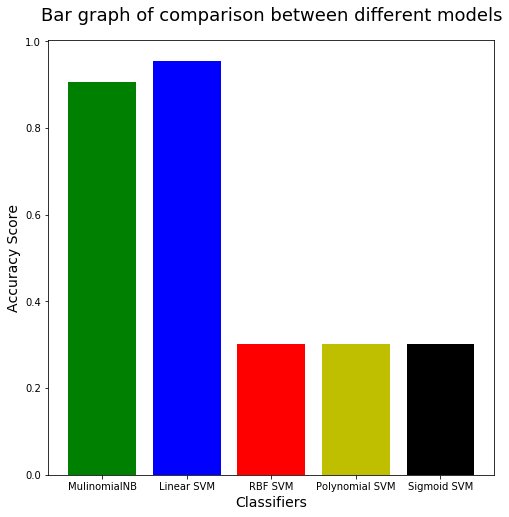

In [38]:

# comparing the performance of all the models
plt.figure(figsize=(8,8))
plt.bar(['MulinomialNB','Linear SVM','RBF SVM','Polynomial SVM','Sigmoid SVM'],evaluation[0:5],color=tuple(["g", "b","r","y","k"]))
plt.xlabel('Classifiers', fontsize=14)
plt.ylabel('Accuracy Score', fontsize=14)
plt.title("Bar graph of comparison between different models", fontsize = 18,y=1.03)
plt.show()

# Q-2d Considering nouns

### Performing POS tagging on raw data

We have performed POS tagging on the RAW data to get the part-of-speech for every word.

In [39]:
# performing POS tagging on cleaned token of words
posTagged_filtered_words=[]
for i in range(len(tokens_words_for_newsgroups)):
    posTagged_filtered_words.append(nltk.pos_tag(tokens_words_for_newsgroups[i]))
print(len(posTagged_filtered_words))
print(posTagged_filtered_words[0])

3387
[('From', 'IN'), (':', ':'), ('healta', 'NN'), ('@', 'NN'), ('saturn.wwc.edu', 'NN'), ('(', '('), ('Tammy', 'NNP'), ('R', 'NNP'), ('Healy', 'NNP'), (')', ')'), ('Subject', 'NN'), (':', ':'), ('Re', 'NN'), (':', ':'), ('who', 'WP'), ('are', 'VBP'), ('we', 'PRP'), ('to', 'TO'), ('judge', 'VB'), (',', ','), ('Bobby', 'NNP'), ('?', '.'), ('Lines', 'NNS'), (':', ':'), ('38', 'CD'), ('Organization', 'NN'), (':', ':'), ('Walla', 'NNP'), ('Walla', 'NNP'), ('College', 'NNP'), ('Lines', 'NNP'), (':', ':'), ('38', 'CD'), ('In', 'IN'), ('article', 'NN'), ('<', '$'), ('1993Apr14.213356.22176', 'CD'), ('@', 'NNP'), ('ultb.isc.rit.edu', 'JJ'), ('>', 'NNP'), ('snm6394', 'NN'), ('@', 'NNP'), ('ultb.isc.rit.edu', 'NN'), ('(', '('), ('S.N', 'NNP'), ('.', '.'), ('Mozumder', 'NNP'), (')', ')'), ('writes', 'VBZ'), (':', ':'), ('>', 'NN'), ('From', 'IN'), (':', ':'), ('snm6394', 'NN'), ('@', 'NN'), ('ultb.isc.rit.edu', 'NN'), ('(', '('), ('S.N', 'NNP'), ('.', '.'), ('Mozumder', 'NNP'), (')', ')'), ('>',

### Considering only nouns before cleaning

Out of all these POS tagged words, we will now find only the noun words. We have considered four categories of nouns: "NN", "NNS", "NNP", and "NNPS." Hence, we have found out noun words for all 3387 documents.

In [40]:
# consider only nouns using posTagged words
only_noun_words=[]
words=[]
for i in range(len(posTagged_filtered_words)):
    words=[]
    for word in posTagged_filtered_words[i]:
        if word[1] in ('NN','NNS','NNP','NNPS'):
            words.append(word[0])
    only_noun_words.append(words)
print(len(only_noun_words))
print(only_noun_words[0])

3387
['healta', '@', 'saturn.wwc.edu', 'Tammy', 'R', 'Healy', 'Subject', 'Re', 'Bobby', 'Lines', 'Organization', 'Walla', 'Walla', 'College', 'Lines', 'article', '@', '>', 'snm6394', '@', 'ultb.isc.rit.edu', 'S.N', 'Mozumder', '>', 'snm6394', '@', 'ultb.isc.rit.edu', 'S.N', 'Mozumder', '>', 'Re', 'Bobby', '>', 'Date', 'Wed', 'Apr', 'GMT', '>', 'article', '<', 'healta.56.734556346', '@', 'saturn.wwc.edu', '>', 'healta', '@', 'saturn.wwc.edu', 'TAMMY', 'R', 'HEALY', '>', '>', 'Bobby', '>', '>', '>', '>', 'liberty', 'writer', '>', '>', 'Ellen', 'G.', 'White', '>', '>', 'remarks', 'group', 'future', '>', '>', 'Do', 'standard', 'opinions', 'views', 'duty', 'interpretations', 'scripture', 'criterion', 'others', '>', '>', 'heart', 'ideal', '>', 'Thoughts', 'Fromthe', 'Mount', 'Blessing', 'p.', '>', '>', '>', '>', 'atheists', 'Ellen', 'White', '>', '>', '>', '>', 'Tammy', '>', '>', 'Point', '>', '>', 'Peace', '>', '>', 'Bobby', 'Mozumder', '>', 'My', 'point', 'views', 'way', 'eveil', 'world', 

## Cleaning the dataset

For cleaning the dataset we have followed 3 steps same as above:

- Remove stop words
- Remove numbers and other non-letter characters
- Stem the words

We have tokenized each news article into only noun words. "newsGroup_filtered_tokens_nouns" list will contain only the noun words for each document. After that, for cleaning the dataset, we have removed stopwords, non-alphabetic characters and numbers. Moreover, we have also removed numbers. Thereafter, we have performed stemming on the words. For example, "Game" and "Gaming" represents the same word, so it can be considered as the single word. For stemming, we have user PorterStemmer from nltk library. After that, we have converted the stemmed word into sentences.

In [41]:
#  removing stopwords, number and other non-letter characters
newsGroup_filtered_tokens_nouns=[]

for i in range(len(only_noun_words)):
    temp=[]
    for w in only_noun_words[i]:
        if ((w not in stop_words_english) and w.isalpha()):
            temp.append(w.lower())
    newsGroup_filtered_tokens_nouns.append(temp)
# printing cleaned tokens of first news article
print(len(newsGroup_filtered_tokens_nouns))
print("Cleaned tokens:\n\n",newsGroup_filtered_tokens_nouns[0])

3387
Cleaned tokens:

 ['healta', 'tammy', 'r', 'healy', 'subject', 're', 'bobby', 'lines', 'organization', 'walla', 'walla', 'college', 'lines', 'article', 'mozumder', 'mozumder', 're', 'bobby', 'date', 'wed', 'apr', 'gmt', 'article', 'healta', 'tammy', 'r', 'healy', 'bobby', 'liberty', 'writer', 'ellen', 'white', 'remarks', 'group', 'future', 'do', 'standard', 'opinions', 'views', 'duty', 'interpretations', 'scripture', 'criterion', 'others', 'heart', 'ideal', 'thoughts', 'fromthe', 'mount', 'blessing', 'atheists', 'ellen', 'white', 'tammy', 'point', 'peace', 'bobby', 'mozumder', 'my', 'point', 'views', 'way', 'eveil', 'world', 'atheism', 'newsgroups', 'posts', 'spirit', 'condemnation', 'atheists', 'newsgroup', 'atheists', 'position', 'attacks', 'messgae', 'quote', 'everyone']


## Stemming the cleaned nouns

In [42]:
stemmed_news_group_nouns=[]
for i in range(len(newsGroup_filtered_tokens_nouns)):
    temp=[]
    for w in newsGroup_filtered_tokens_nouns[i]:
        temp.append(ps.stem(w))
    stemmed_news_group_nouns.append(temp)
    
print(len(stemmed_news_group_nouns))       
print("Stemmed tokens\n\n",stemmed_news_group_nouns[0])

3387
Stemmed tokens

 ['healta', 'tammi', 'r', 'heali', 'subject', 're', 'bobbi', 'line', 'organ', 'walla', 'walla', 'colleg', 'line', 'articl', 'mozumd', 'mozumd', 're', 'bobbi', 'date', 'wed', 'apr', 'gmt', 'articl', 'healta', 'tammi', 'r', 'heali', 'bobbi', 'liberti', 'writer', 'ellen', 'white', 'remark', 'group', 'futur', 'do', 'standard', 'opinion', 'view', 'duti', 'interpret', 'scriptur', 'criterion', 'other', 'heart', 'ideal', 'thought', 'fromth', 'mount', 'bless', 'atheist', 'ellen', 'white', 'tammi', 'point', 'peac', 'bobbi', 'mozumd', 'my', 'point', 'view', 'way', 'eveil', 'world', 'atheism', 'newsgroup', 'post', 'spirit', 'condemn', 'atheist', 'newsgroup', 'atheist', 'posit', 'attack', 'messga', 'quot', 'everyon']


In [43]:
# converting nouns into sentences
for i in range(len(stemmed_news_group_nouns)):
    stemmed_news_group_nouns[i]=" ".join(stemmed_news_group_nouns[i])

print(stemmed_news_group_nouns[0])

healta tammi r heali subject re bobbi line organ walla walla colleg line articl mozumd mozumd re bobbi date wed apr gmt articl healta tammi r heali bobbi liberti writer ellen white remark group futur do standard opinion view duti interpret scriptur criterion other heart ideal thought fromth mount bless atheist ellen white tammi point peac bobbi mozumd my point view way eveil world atheism newsgroup post spirit condemn atheist newsgroup atheist posit attack messga quot everyon


## Bag of words representation of nouns

If we consider only nouns, the size of the vocabulary for bag-of-words has reduced to 19404. However, it was 23107 for all words in answer 2-c.

In [44]:
# bag of words representation of nouns
count_vect = CountVectorizer()
bagOfWords_noun= count_vect.fit_transform(stemmed_news_group_nouns)
bagOfWords_noun.shape

(3387, 19404)

## TF-IDF weighted vector of nouns

Similarly, if we consider only nouns, the size of the vocabulary for TF-IDF weighted vector representation has reduced to 19404. However, it was 23107 for all words in answer 2-c.

In [45]:
# generating tf-idf vector
tfidf_transformer_noun = TfidfTransformer()
tfidf_noun = tfidf_transformer.fit_transform(bagOfWords_noun)
tfidf_noun.shape

(3387, 19404)

## Splitting data 

Splittng the dataset into training set and testing set as following :

1. Training Set - 70%
2. Testing Set - 30%

Hence, 2370 documents are in training set and 1017 documents are in testing set.

In [46]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_noun, newsgroups_data.target, test_size=0.30,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
y_train=y_train.reshape((y_train.shape[0],1))
y_test=y_test.reshape((y_test.shape[0],1))

(2370, 19404)
(2370,)
(1017, 19404)
(1017,)


## Training MultinomialNB on nouns

In [47]:
NB_clf_noun= MultinomialNB().fit(X_train,y_train)

### Evaluating MultinomialNB 

For only nouns, the results for MultinomialNB has improved by approximately 2-3%. For example, for all the words MultinomialNB had 90% accuracy. However, for only noun words it has 92% approximate accuracy. Similarly, results for Precision, and Recall has improved in case of only nouns.

In [48]:
y_predicted_multinomialNB=evaluateClassifier(classifier=NB_clf_noun,model="MultinomialNB classifier",index=5)

Performance of MultinomialNB classifier

Training accuracy score: 0.958
Test accuracy_score:0.920
Precision: 0.928
Recall: 0.920
F1: 0.916



### Confusion matrix of MultinomialNB

As confusion matrix table below shows, we can say that if we consider only nouns, 44 instance of "sci.shape" are mis-classified as "alt.atheism". However, in case of all words, the number of wrongly-classified instances were 63. Hence, we can say that, it has improved in case of only nouns. 

In [49]:
confusionMatrix("MultinomialNB",y_predicted_multinomialNB)

Confusion matrix of MultinomialNB


,alt.atheism,talk.religion.misc,comp.graphics,sci.space
alt.atheism,221,0,2,1
talk.religion.misc,0,292,5,0
comp.graphics,2,6,299,0
sci.space,44,5,16,124


## Training and evaluating Linear SVM on nouns

Performance of Linear SVM in case of onnly noun words is shown in below table. As it can be seen in the table, we can say that, the results are almost similar to that of all words. Hence, the accuracy of Linear SVM has not improves even if we consider only the noun words. The evaluation metrices remains the same.

In [50]:
SVM_clf_linear_noun=LinearSVC(loss='hinge', penalty='l2', random_state=42).fit(X_train,y_train)
y_predicted_SVM_linear=evaluateClassifier(classifier=SVM_clf_linear_noun,model="Support vector machine classifier with linear kernel ",index=6)

Performance of Support vector machine classifier with linear kernel 

Training accuracy score: 0.994
Test accuracy_score:0.954
Precision: 0.954
Recall: 0.954
F1: 0.954



c:\users\shrey amin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Confusion matrix of linear SVM

As confusion matrix table below shows, we can say that even if we consider only nouns, the number of wrongly-classified instances remains the same and it is 12. Hence, we can say that, Linear SVM has the same results in case of all words and noun words both.

In [51]:
confusionMatrix("Linear SVM",y_predicted_SVM_linear)

Confusion matrix of Linear SVM


,alt.atheism,talk.religion.misc,comp.graphics,sci.space
alt.atheism,209,1,4,10
talk.religion.misc,0,295,2,0
comp.graphics,1,10,295,1
sci.space,12,5,1,171


## Comparing performance on stemmed all words and stemmed noun words

We have shown the comparison of Multinomial NB and Linear SVM in case of both noun words and all the words. As it can be seen in the table, the accuracy score of Multinomial Naive Bayes increases to approximately 92% for noun words from 90% for all words. Whereas, the accuracy score remains the same approximately (95%) in case of Linear SVM for both the noun words and all words case.

In [52]:
# comparing the performance with stemmed tokens and noun tokens
evaluation_score_list=[0,0,0,0]
evaluation_score_list[0]=evaluation[0]
evaluation_score_list[1]=evaluation[5]
evaluation_score_list[2]=evaluation[1]
evaluation_score_list[3]=evaluation[6]
comparison_df=pd.DataFrame([[evaluation[0],evaluation[1]],[evaluation[5],evaluation[6]]],index=["Stemmed features","Noun features"],columns=["MultinomialNB","Linear SVM"])
print("Accuracy score in both the approaches")
comparison_df


Accuracy score in both the approaches


,MultinomialNB,Linear SVM
Stemmed features,0.907571,0.955752
Noun features,0.920354,0.953786


### Bar Graph for comparison

We have also shown the bar graph for both Multinomial NB and Linear SVM in case of both the noun words and all words.

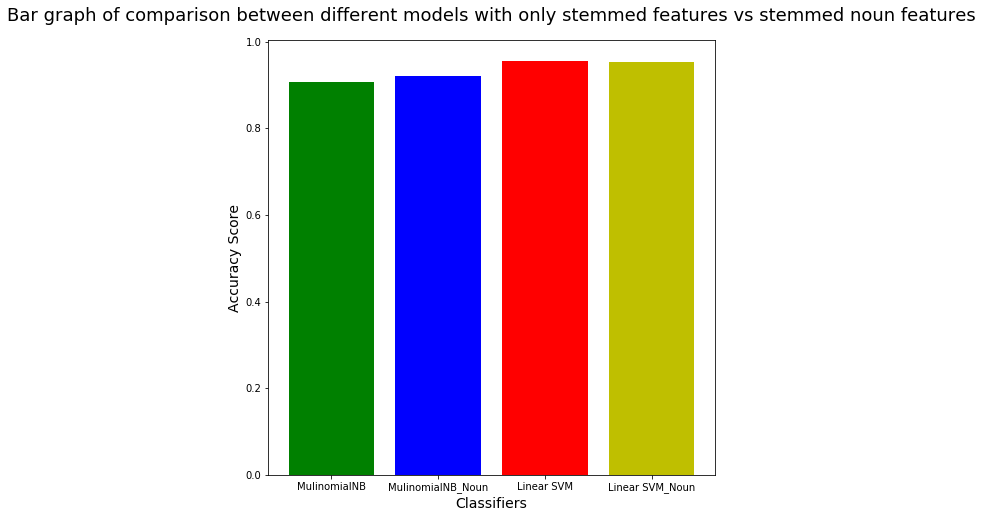

In [53]:
plt.figure(figsize=(8,8))
plt.bar(['MulinomialNB','MulinomialNB_Noun','Linear SVM','Linear SVM_Noun'],evaluation_score_list,color=tuple(["g", "b","r","y","k"]))
plt.xlabel('Classifiers', fontsize=14)
plt.ylabel('Accuracy Score', fontsize=14)
plt.title("Bar graph of comparison between different models with only stemmed features vs stemmed noun features", fontsize = 18,y=1.03)
plt.show()

## Comparing size of vocabularies

As discussed above, the size of vocabulary for all words was 23107 and for noun words it was 19404. We have plotted the bar graph to show the comparison between both. Moreover, with less number of features the perfromance of both the models does not decrease. So, its better if we consider only nouns as the feature vector.

Total features in stemming:  23107
Total features in considering only nouns:  19404


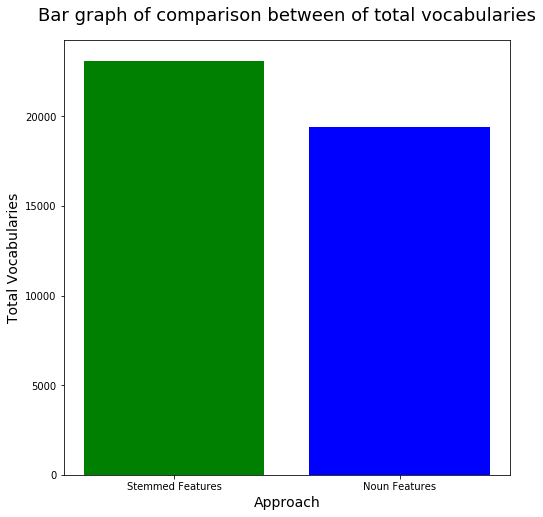

In [54]:
#  comparing vocabularies
print("Total features in stemming: ",bagOfWords.shape[1])
print("Total features in considering only nouns: ",bagOfWords_noun.shape[1])
plt.figure(figsize=(8,8))
plt.bar(['Stemmed Features','Noun Features'],[bagOfWords.shape[1],bagOfWords_noun.shape[1]],color=tuple(["g", "b","r","y","k"]))
plt.xlabel('Approach', fontsize=14)
plt.ylabel('Total Vocabularies', fontsize=14)
plt.title("Bar graph of comparison between of total vocabularies", fontsize = 18,y=1.03)
plt.show()

## References

- Tutorial 6
- Collocations : https://medium.com/@nicharuch/collocations-identifying-phrases-that-act-like-individual-words-in-nlp-f58a93a2f84a
- Bag-of-words representation : https://machinelearningmastery.com/gentle-introduction-bag-words-model/
- TF-IDF weighted vector representation : https://www.commonlounge.com/discussion/99e86c9c15bb4d23a30b111b23e7b7b1
- SVM with different kernels : https://scikit-learn.org/stable/modules/svm.html
- Comparison between Multinomial NB and SVM - https://stackoverflow.com/questions/35360081/naive-bayes-vs-svm-for-classifying-text-data